In [10]:
from tensorflow import keras
import random
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
rand_num = random.randint(0,60000)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
chosen_x,chosen_y = x_train[rand_num],y_train[rand_num]

Text(0.5, 1.0, 'Label: 2')

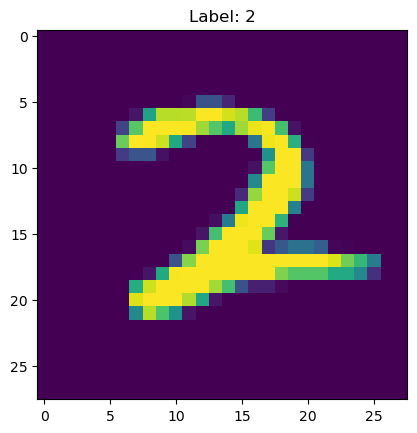

In [9]:
plt.imshow(chosen_x)
plt.title("Label: " + str(chosen_y))

# Prepare the data before working on them

In [11]:
#Normalizing the images
x_train = (x_train/255) - 0.5
x_test = (x_test/255) - 0.5

#Reshape the images for Keras
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [15]:
(x_train.shape,x_test.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [71]:
(y_train.shape, y_test.shape)

((60000,), (10000,))

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, ReLU, Dropout, Softmax
from tensorflow.keras.utils import to_categorical

In [65]:
model = Sequential()
model.add(Conv2D(8,kernel_size=(3,3),padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(3,3),padding='same', activation='relu', input_shape=(14, 14, 8)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(7, 7, 16)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10,activation='softmax'))


In [66]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 flatten_6 (Flatten)         (None, 1568)            

In [67]:
#Compiling the model
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [77]:
#Training the above model
model.fit(
  x_train,
  y_train,
  epochs=10,
  validation_data=(x_test, y_test)
)

Epoch 1/10




ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [74]:
to_categorical(y_train[0])

array([0., 0., 0., 0., 0., 1.], dtype=float32)